In [131]:
%reset -f

import numpy as np
import scipy as sp

import matplotlib.pyplot as plt

from scipy.stats import randint
from scipy.stats import norm
from scipy.stats import beta

import pandas as pd

np.random.seed(seed=5)

In [133]:
Y = []
X = []

beta_0 = []
beta_1 = []
mood   = []

for i in range(1,200):
    
    ind = randint.rvs(0,3)
    b0  = ind * 6 + 5
    b1  = ind * 6 + 5

    income = norm.rvs(loc=5, scale=5, size=1)[0]
    random = norm.rvs(loc=0, scale=5, size=1)[0]

    consumption = b0 + b1 * income + random
    
    Y.append(consumption)
    X.append(income)
    beta_0.append(b0)
    beta_1.append(b1)
    mood.append(ind)
    
d = {'Y' : pd.Series(Y),
     'X' : pd.Series(X),
     'mood' : pd.Series(mood)
    }
 
df = pd.DataFrame(d)

In [134]:
df

,Y,X,mood
0,-35.240499,-2.944226,2
1,45.711116,8.747853,0
2,34.503411,1.282048,2
3,20.557005,4.871802,0
4,7.320667,0.010353,0
...,...,...,...
194,24.579496,2.814870,0
195,98.604924,4.617829,2
196,131.715973,10.519583,1
197,187.981760,10.320526,2


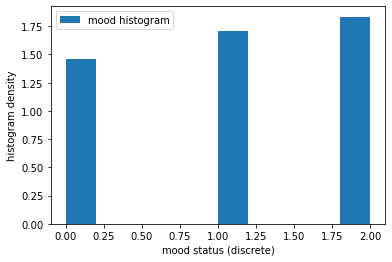

In [211]:
fig = plt.figure()

plt.hist(df['mood'], density=True, label="mood histogram")
plt.ylabel('histogram density')
plt.xlabel('mood status (discrete)')
plt.legend()


plt.show()

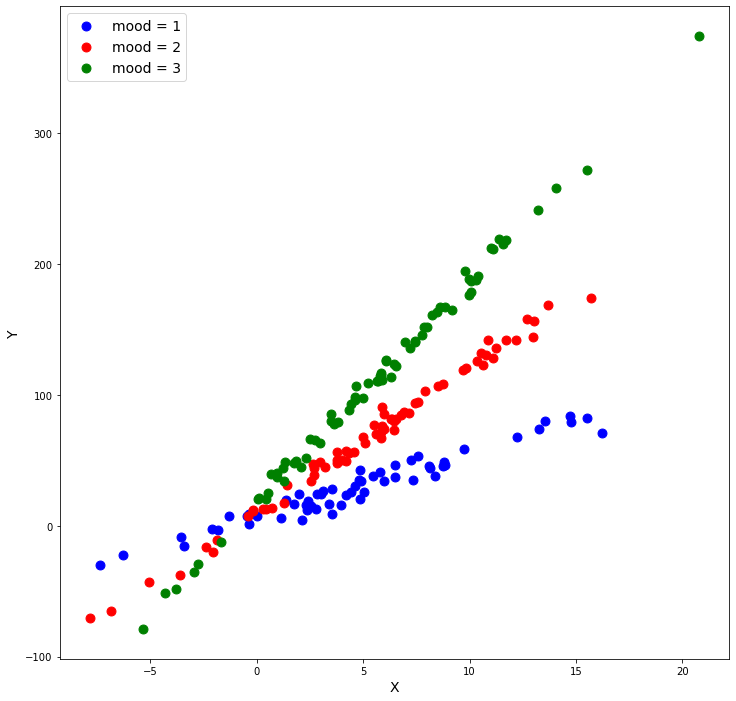

In [213]:
fig = plt.figure()

fig.set_figheight(12)
fig.set_figwidth(12)

plt.scatter(df['X'][df['mood'] == 0], df['Y'][df['mood'] == 0], color='blue', label='mood = 1', s=80)
plt.scatter(df['X'][df['mood'] == 1], df['Y'][df['mood'] == 1], color='red', label='mood = 2', s=80)
plt.scatter(df['X'][df['mood'] == 2], df['Y'][df['mood'] == 2], color='green', label='mood = 3', s=80)

plt.xlabel('X', fontsize="14")
plt.ylabel('Y', fontsize="14")

plt.legend(fontsize="14")

plt.show()

In [154]:
Y1 = []
X1 = []

beta1_0 = []
beta1_1 = []
group1  = []

for i in range(1,200):
    
    ind1 = beta.rvs(2, 2, size=1)[0] * 2 - 1;
    b10  = ind1 * 10
    b11  = ind1 * 10

    income = norm.rvs(loc=5, scale=5, size=1)[0]
    random = norm.rvs(loc=0, scale=5, size=1)[0]

    consumption = b10 + b11 * income + random
    
    Y1.append(consumption)
    X1.append(income)
    beta1_0.append(b10)
    beta1_1.append(b11)
    group1.append(ind1)
    
d1 = {'Y' : pd.Series(Y1),
     'X' : pd.Series(X1),
     'mood' : pd.Series(group1)
    }
 
df1 = pd.DataFrame(d1)

In [155]:
df1

,Y,X,mood
0,0.223108,13.026305,-0.056444
1,-54.503265,9.613291,-0.567976
2,37.843312,8.195828,0.308085
3,-16.437497,7.963274,-0.169126
4,-66.203373,8.297309,-0.794723
...,...,...,...
194,-53.642043,4.950613,-0.819821
195,18.806497,9.050706,0.118805
196,-87.445382,19.132238,-0.441702
197,14.855987,6.432003,0.135921


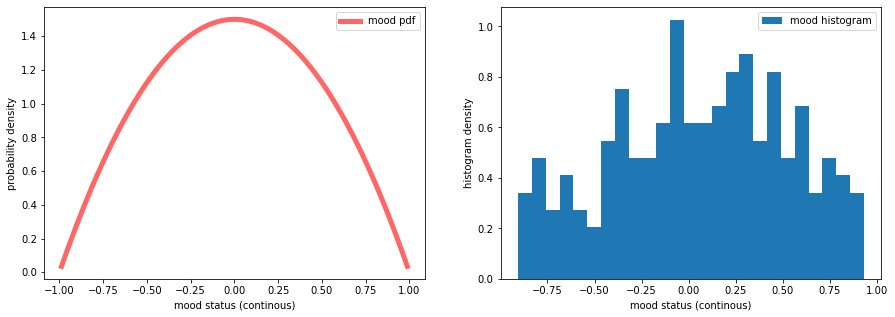

In [156]:
x = np.linspace(beta.ppf(0.0001, 2, 2),
                beta.ppf(0.9999, 2, 2), 100)

fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

ax1.plot((x-0.5)*2, beta.pdf(x, 2, 2), 'r-', lw=5, alpha=0.6, label='mood pdf')
ax1.set_ylabel('probability density')
ax1.set_xlabel('mood status (continous)')
ax1.legend()

ax2.hist(df1['mood'], bins=25, density=True, label="mood histogram")
ax2.set_ylabel('histogram density')
ax2.set_xlabel('mood status (continous)')
ax2.legend()


plt.show()

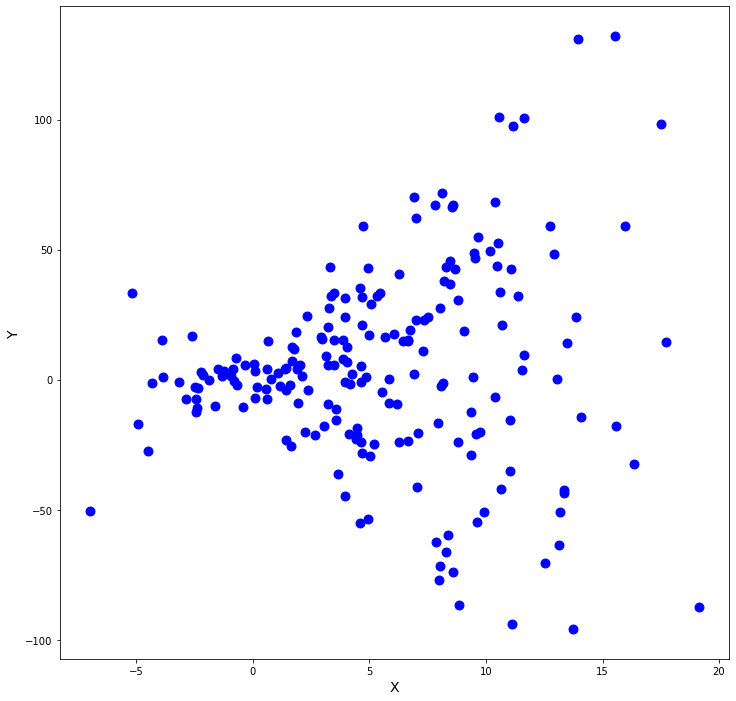

In [198]:
fig = plt.figure()

fig.set_figheight(12)
fig.set_figwidth(12)

plt.scatter(df1['X'], df1['Y'], color='blue', s=80)

plt.xlabel('X', fontsize="14")
plt.ylabel('Y', fontsize="14")

plt.show()

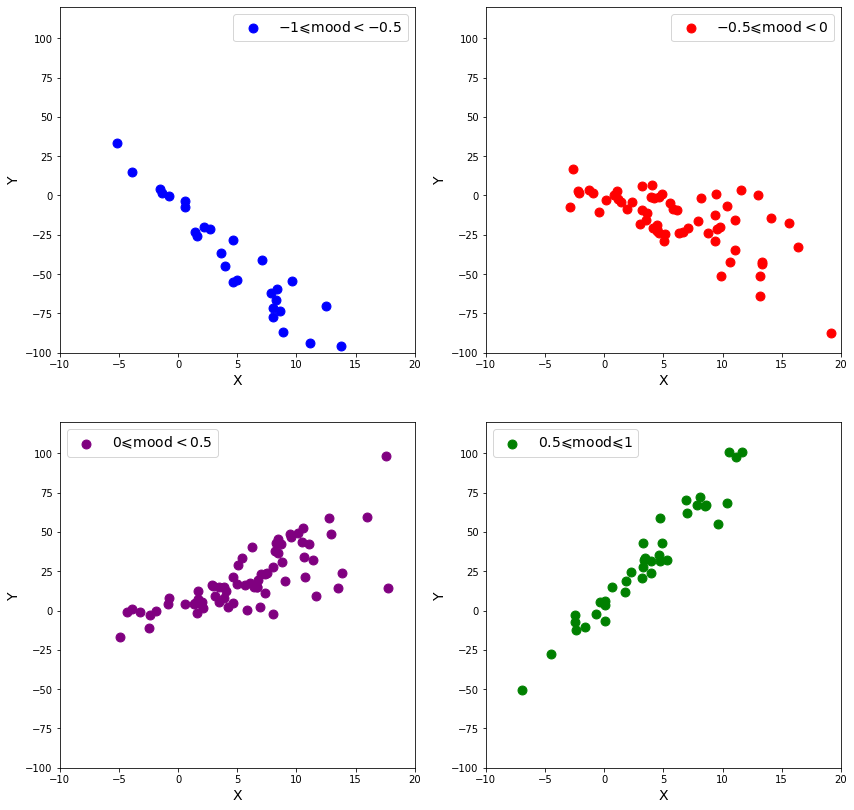

In [190]:
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2)

fig.set_figheight(14)
fig.set_figwidth(14)

ax1.scatter(df1['X'][df1['mood'] <= -0.5], df1['Y'][df1['mood'] <= -0.5], color='blue', label=r'$ -1 \leqslant \mathrm{mood} < -0.5$', s=80)
ax1.set_xlabel('X', fontsize='14')
ax1.set_ylabel('Y', fontsize='14')
ax1.set_xlim([-10, 20])
ax1.set_ylim([-100, 120])
ax1.legend(fontsize='14')

ax2.scatter(df1['X'][(df1['mood'] < 0) & (df1['mood'] > -0.5)] , df1['Y'][(df1['mood'] < 0) & (df1['mood'] > -0.5)], color='red', label=r'$-0.5 \leqslant \mathrm{mood} < 0$', s=80)
ax2.set_xlabel('X', fontsize='14')
ax2.set_ylabel('Y', fontsize='14')
ax2.set_xlim([-10, 20])
ax2.set_ylim([-100, 120])
ax2.legend(fontsize='14')

ax3.scatter(df1['X'][(df1['mood'] < 0.5) & (df1['mood'] > 0)] , df1['Y'][(df1['mood'] < 0.5) & (df1['mood'] > 0)], color='purple', label=r'$0 \leqslant \mathrm{mood} < 0.5$', s=80)
ax3.set_xlabel('X', fontsize='14')
ax3.set_ylabel('Y', fontsize='14')
ax3.set_xlim([-10, 20])
ax3.set_ylim([-100, 120])
ax3.legend(fontsize='14')

ax4.scatter(df1['X'][(df1['mood'] < 1) & (df1['mood'] > 0.5)] , df1['Y'][(df1['mood'] < 1) & (df1['mood'] > 0.5)], color='green', label=r'$0.5 \leqslant \mathrm{mood} \leqslant 1$', s=80)
ax4.set_xlabel('X', fontsize='14')
ax4.set_ylabel('Y', fontsize='14')
ax4.set_xlim([-10, 20])
ax4.set_ylim([-100, 120])
ax4.legend(fontsize='14')

plt.show()